#### Problem Statement

### Loading the Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("E:\\Capstone Projects\\PRCP-1000-Portugese Bank\\PRCP-1000-ProtugeseBank\\Data\\bank-additional\\bank-additional-full.csv", sep=";")

In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Three categories of features
 - Customer Details
 - Campaign Details
 - Previous Marketing Interactionr

# Task 1 - Data Analysis

## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

 - The data has no null values

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
# Numerical Columns

num_columns = ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

# Categorical Columns

cat_columns = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']

### Plots - Univariate Analysis

#### Plots for Numeric Values

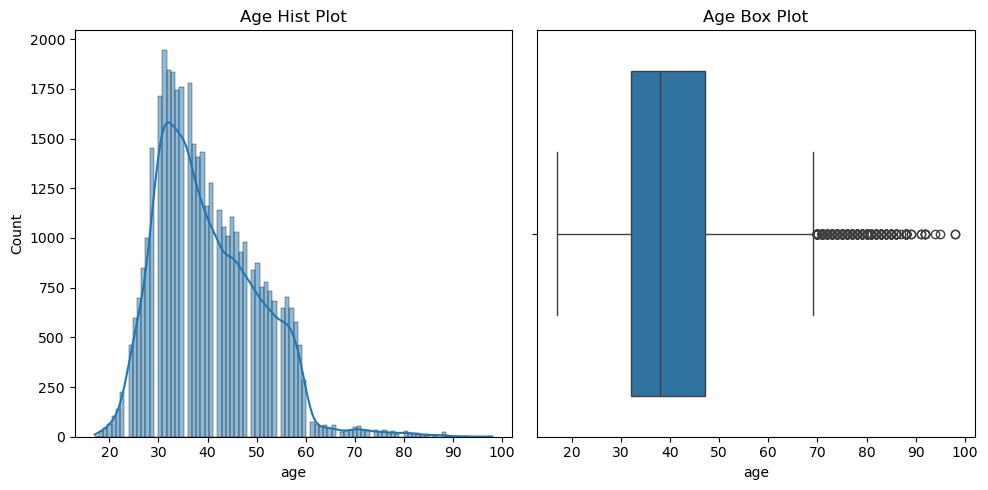

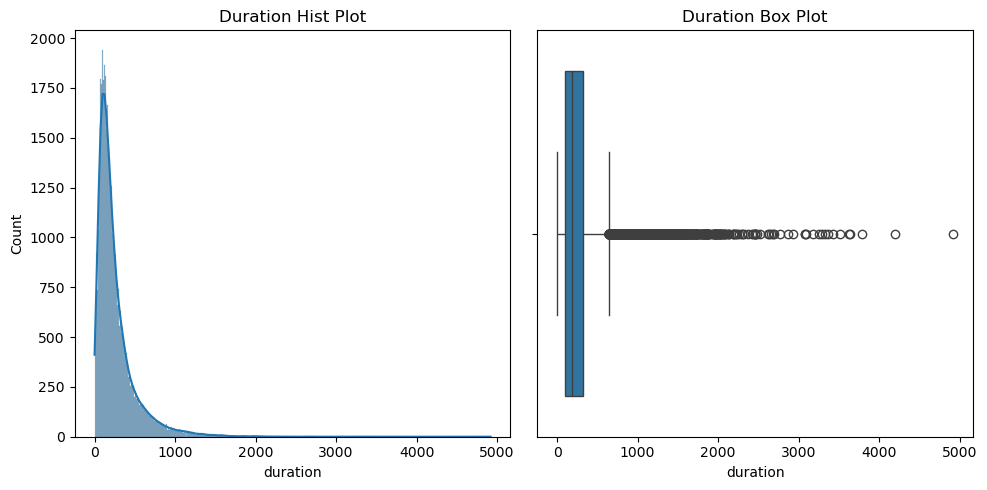

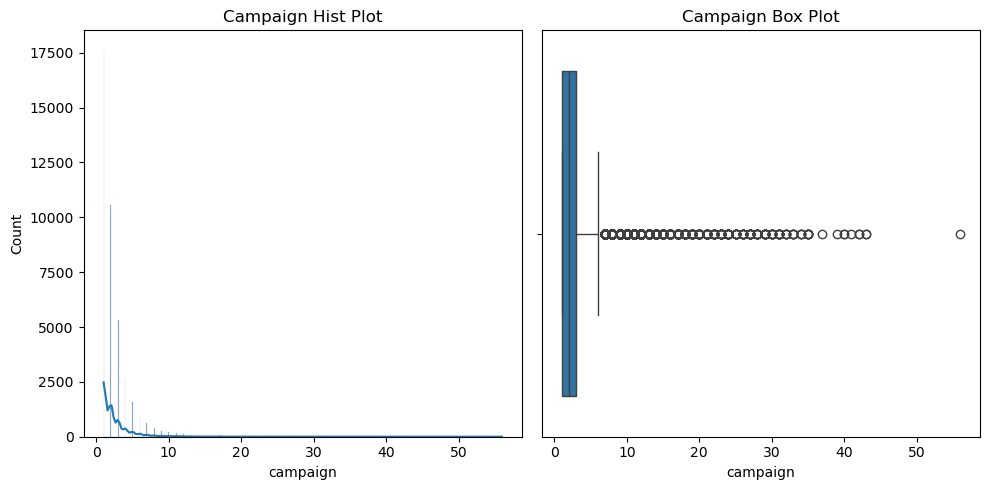

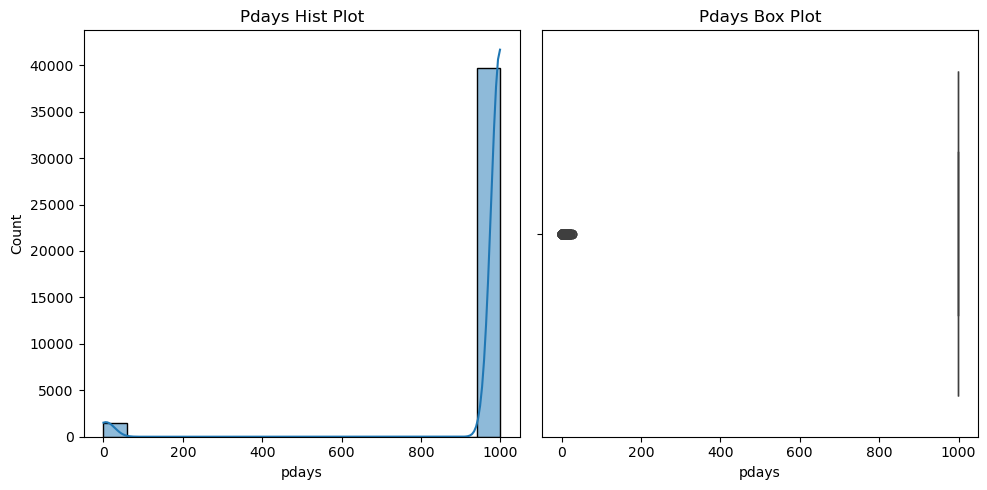

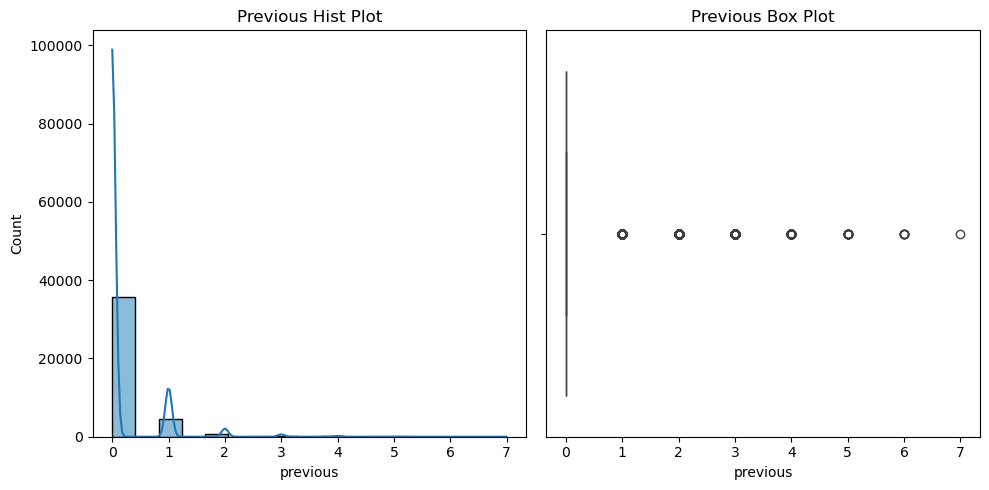

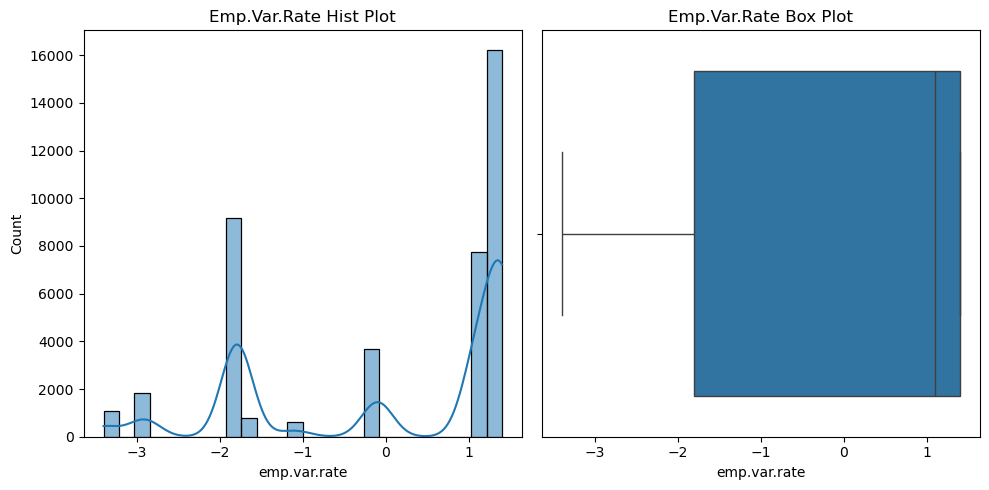

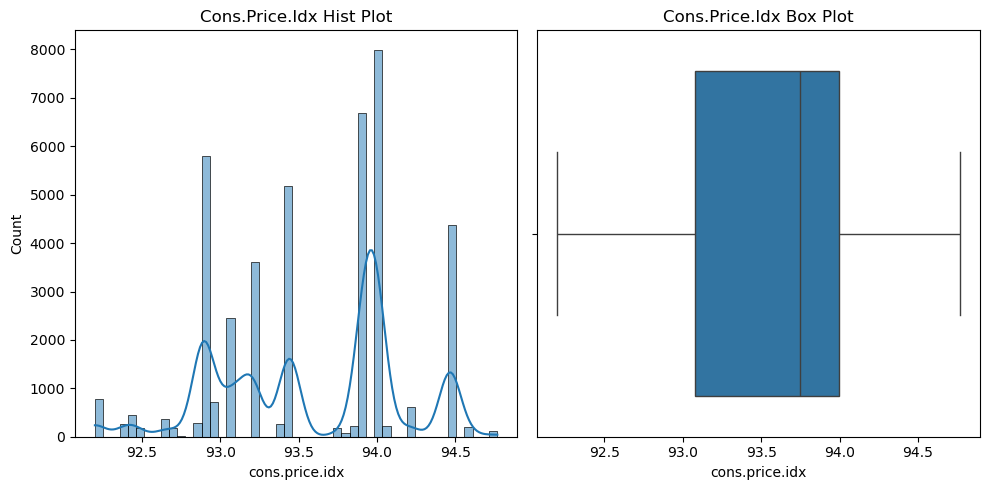

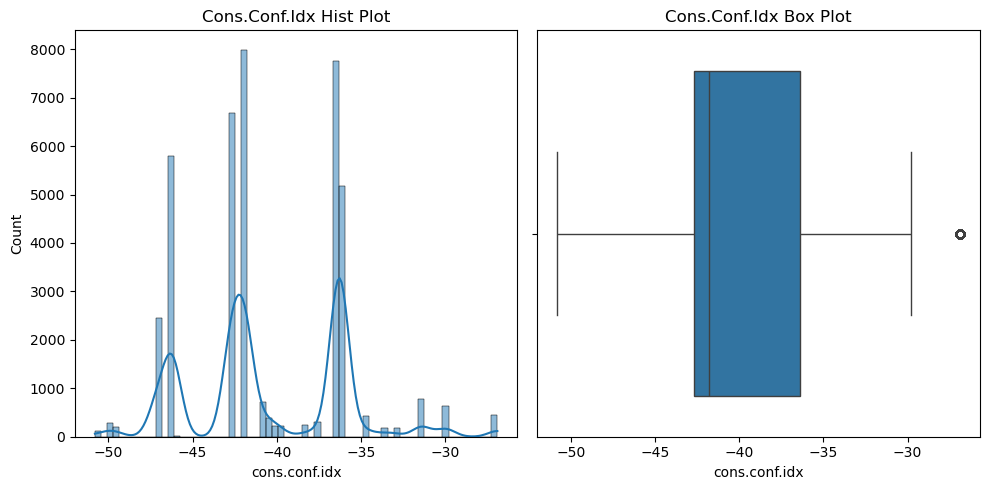

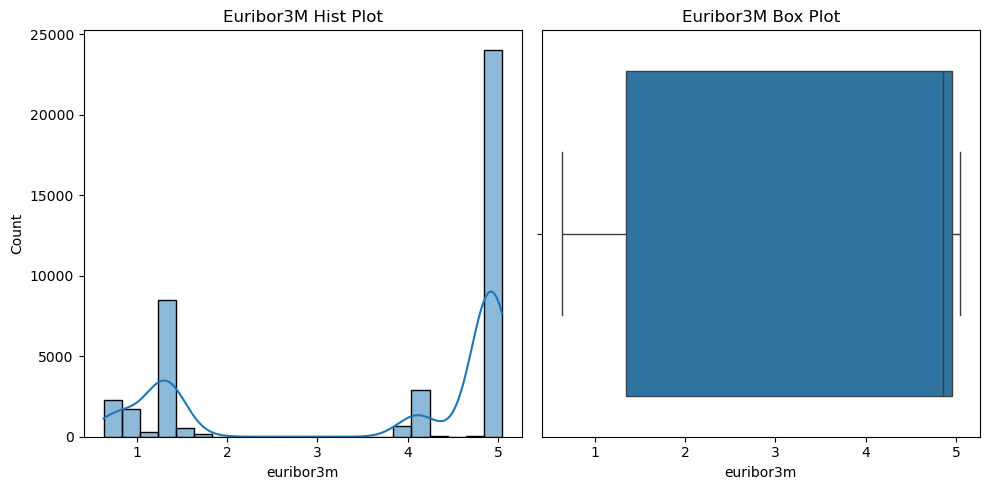

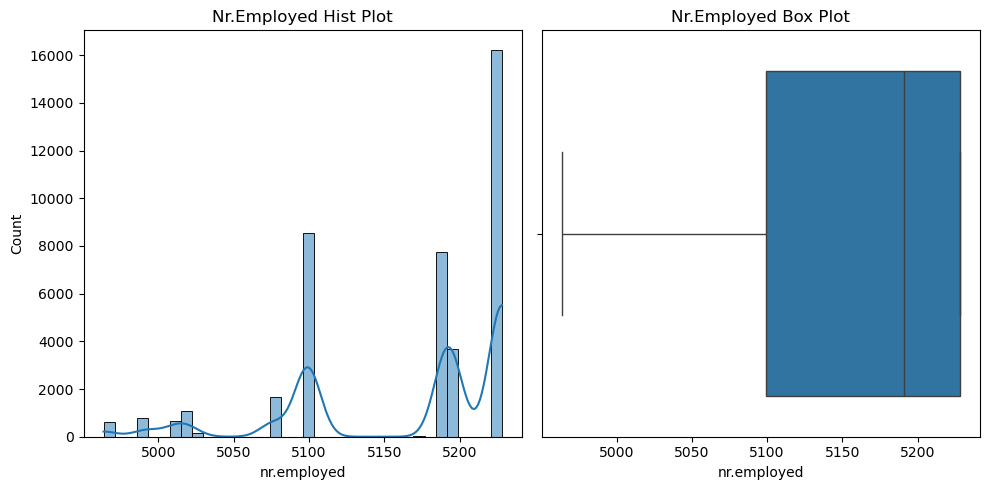

In [7]:
for col in num_columns:
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    sn.histplot(df[col],kde=True)
    plt.title(f'{col.title()} Hist Plot')
    
    plt.subplot(1,2,2)
    sn.boxplot(x=df[col])
    plt.title(f'{col.title()} Box Plot')

    plt.tight_layout()
    plt.show()

In [8]:
df.skew(numeric_only = True)

# Found skewness

age               0.784697
duration          3.263141
campaign          4.762507
pdays            -4.922190
previous          3.832042
emp.var.rate     -0.724096
cons.price.idx   -0.230888
cons.conf.idx     0.303180
euribor3m        -0.709188
nr.employed      -1.044262
dtype: float64

#### Plot for categorical Values

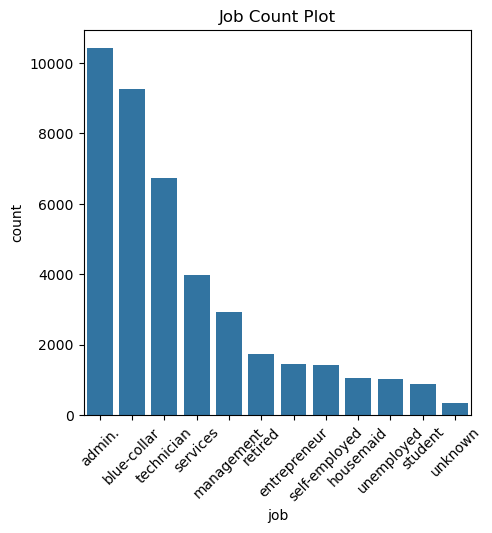

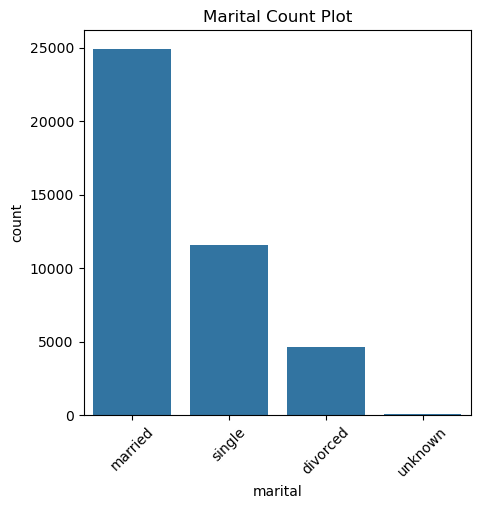

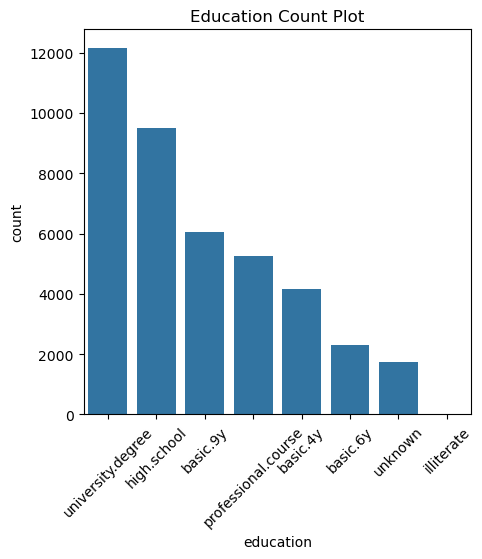

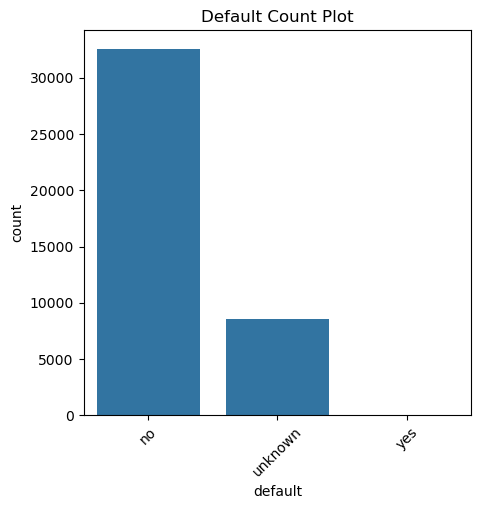

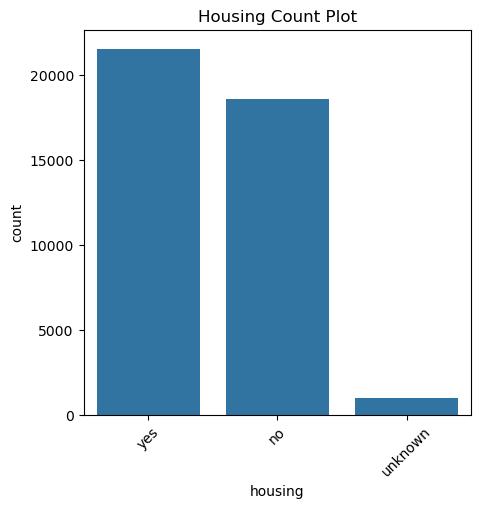

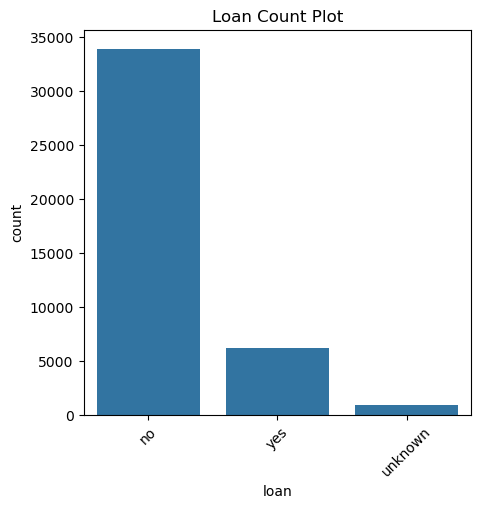

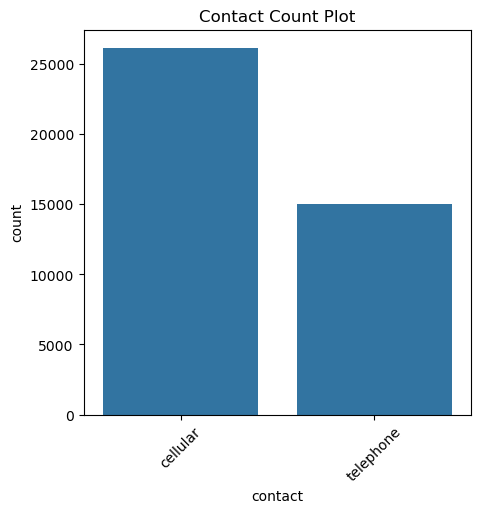

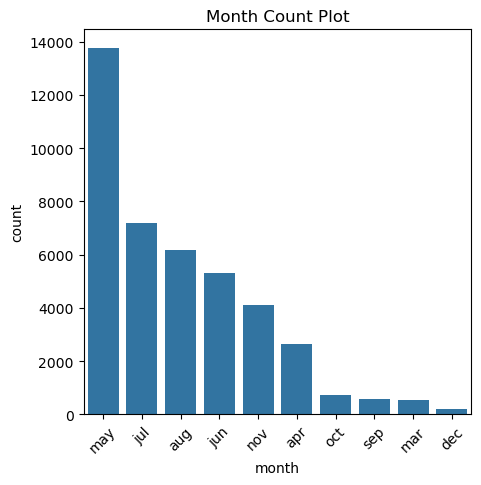

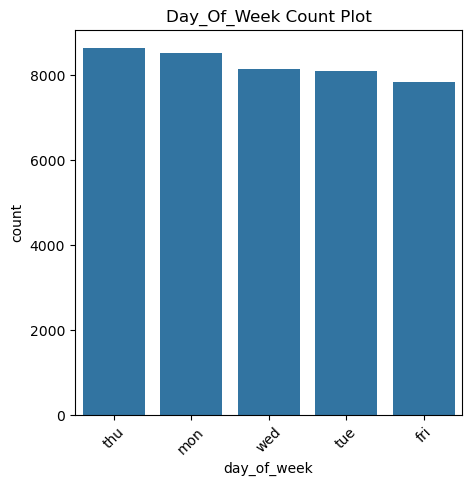

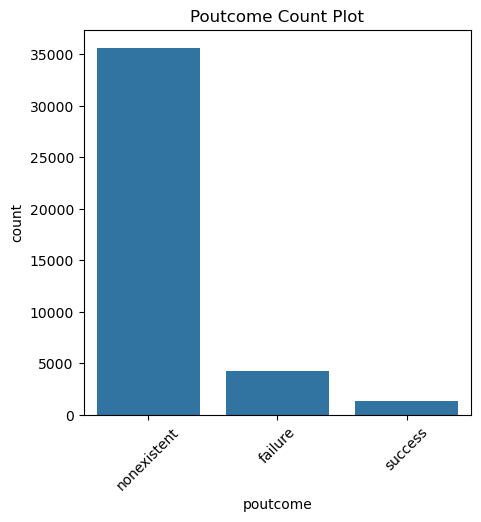

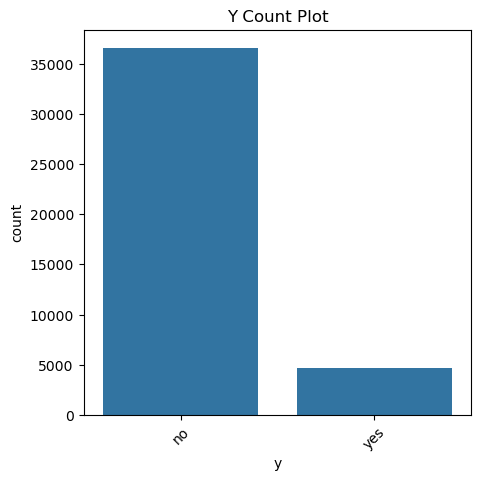

In [9]:
for col in cat_columns:
    plt.figure(figsize=(5,5))
    sn.countplot(data = df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'{col.title()} Count Plot')
    plt.show()

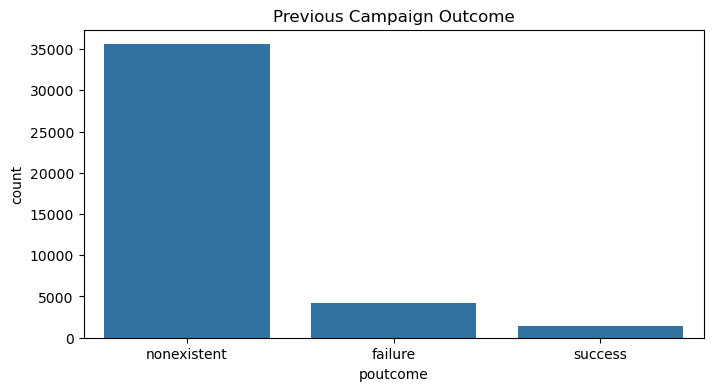

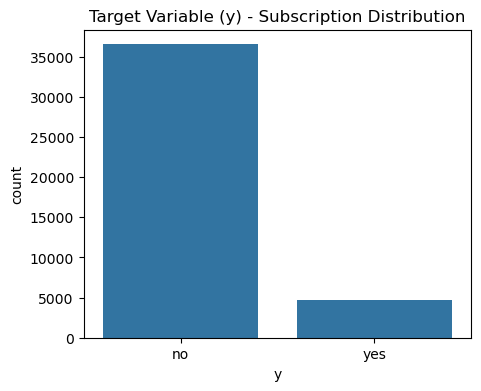

In [10]:
# Plot poutcome separately
plt.figure(figsize=(8, 4))
sn.countplot(data=df, x='poutcome', order=df['poutcome'].value_counts().index)
plt.title('Previous Campaign Outcome')
plt.show()

# Plot the target variable y
plt.figure(figsize=(5, 4))
sn.countplot(data=df, x='y')
plt.title('Target Variable (y) - Subscription Distribution')
plt.show()

In [11]:
'''Job-Admin,Blue Collar,Technician are moree tha 7000, unknown label is below 100, unemployed housemaid and students are less than 1000

Married is very high,unknown is very low, single and divorced are moderate

Education illiterate is very very less

Month May is the highest nearly 14,000 oct,sep,mar is less than 1000, dec is very lowest

poutcome non existent is 35000,wheras failure is less than 5000 and success is less than 100

y is imbalanced data it seems yes nearly 5000 but no nearly 35000'''

'Job-Admin,Blue Collar,Technician are moree tha 7000, unknown label is below 100, unemployed housemaid and students are less than 1000\n\nMarried is very high,unknown is very low, single and divorced are moderate\n\nEducation illiterate is very very less\n\nMonth May is the highest nearly 14,000 oct,sep,mar is less than 1000, dec is very lowest\n\npoutcome non existent is 35000,wheras failure is less than 5000 and success is less than 100\n\ny is imbalanced data it seems yes nearly 5000 but no nearly 35000'

### Bivariate Analysis Categorical vs Target

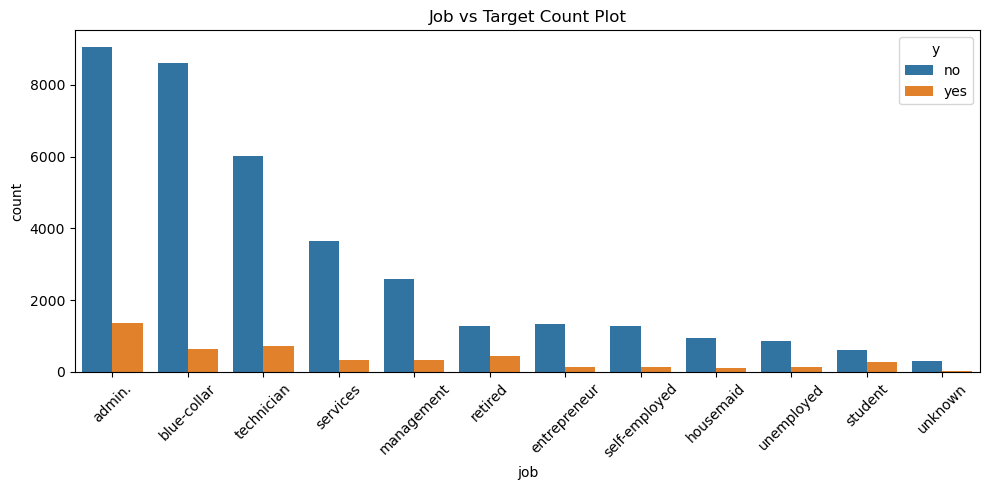

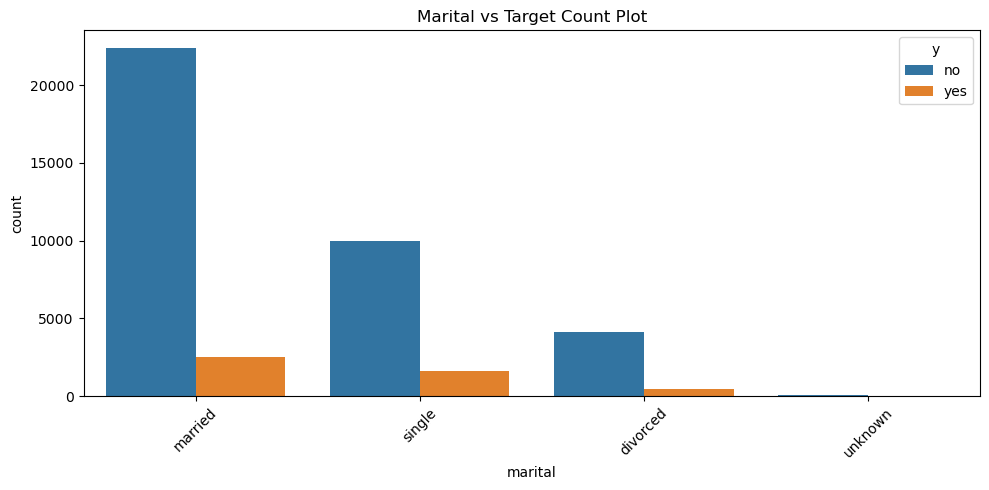

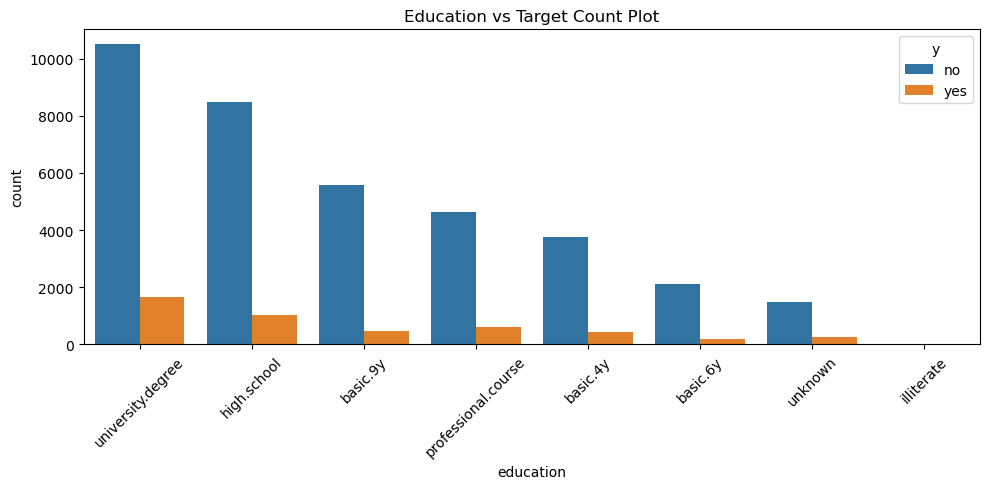

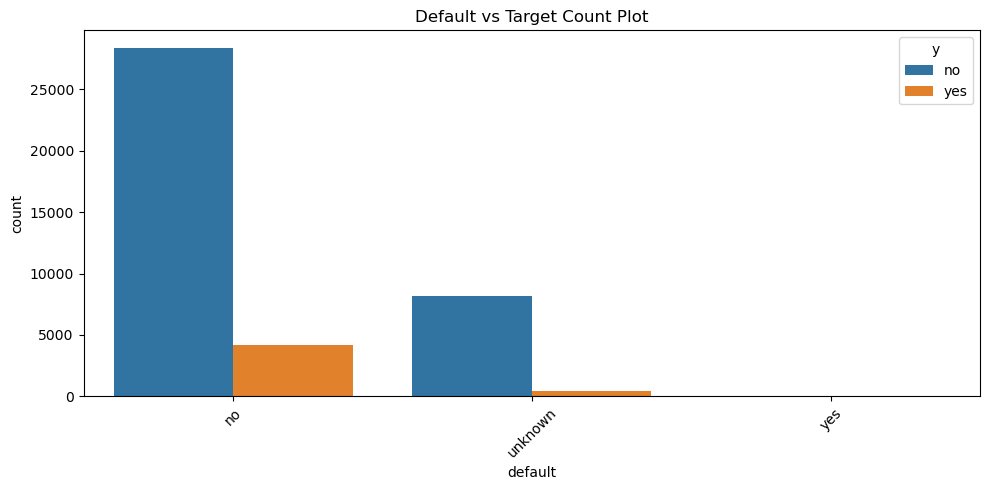

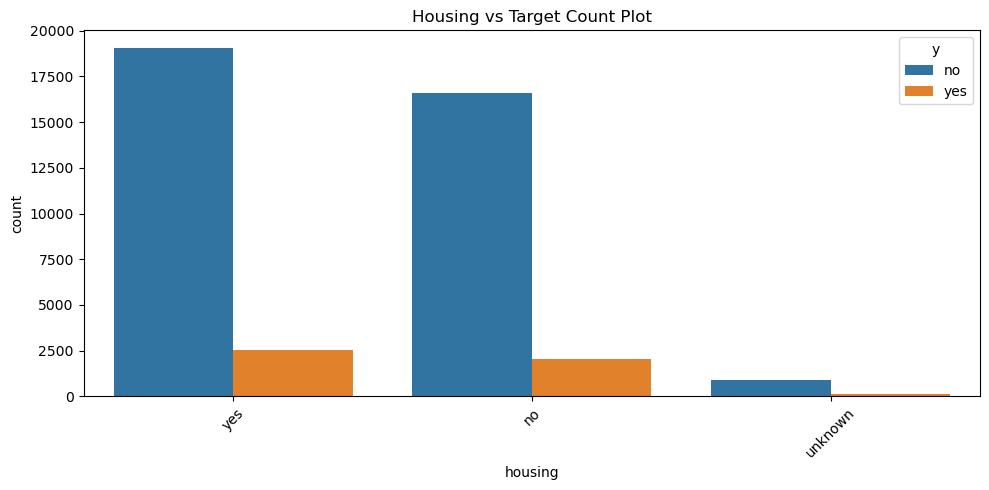

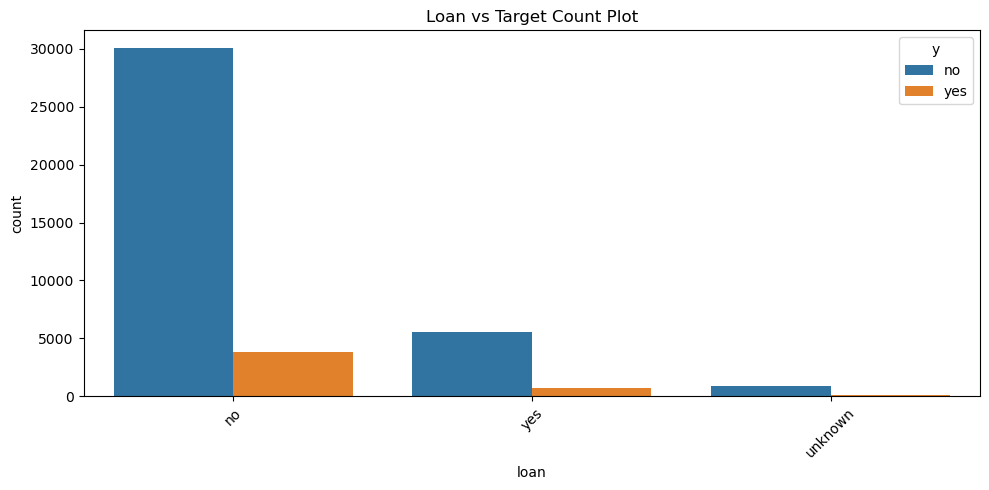

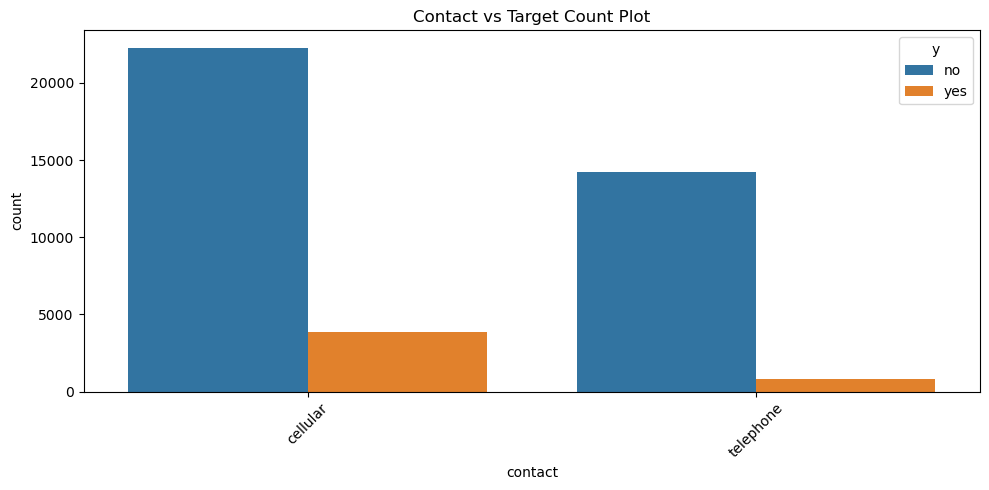

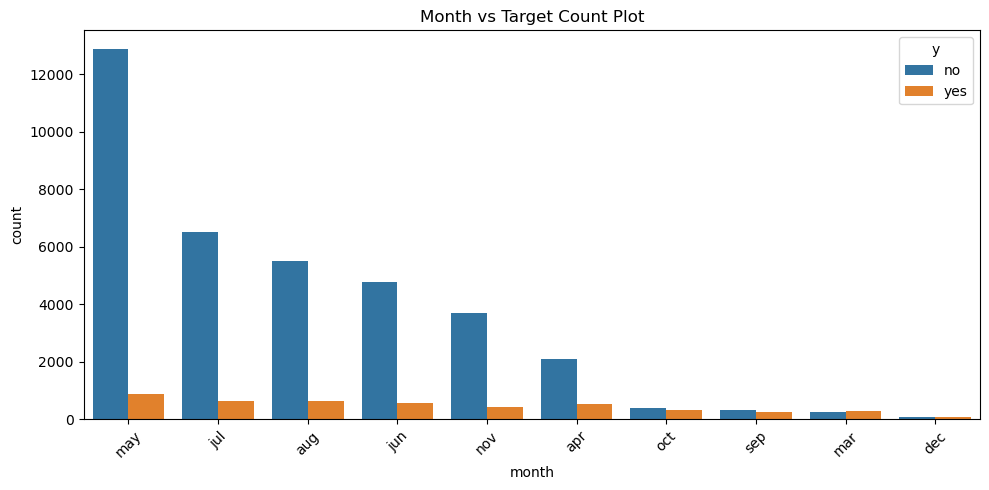

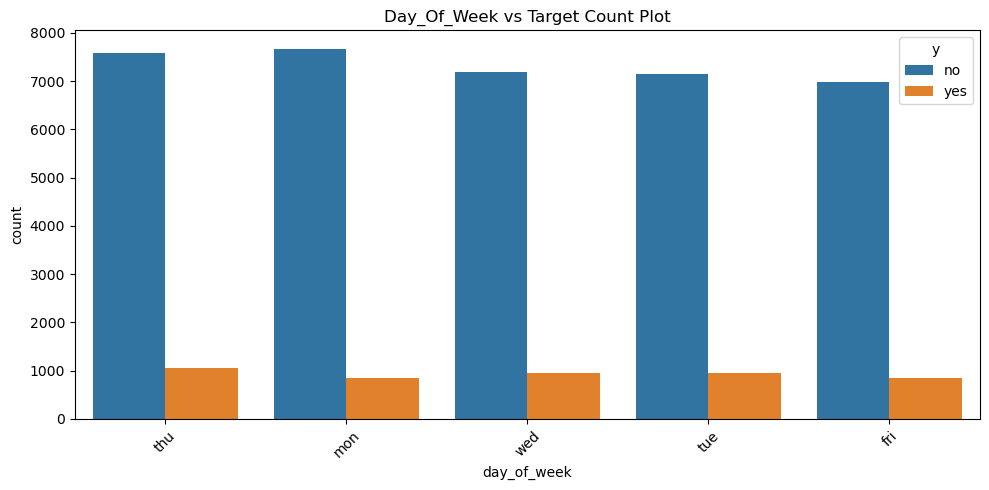

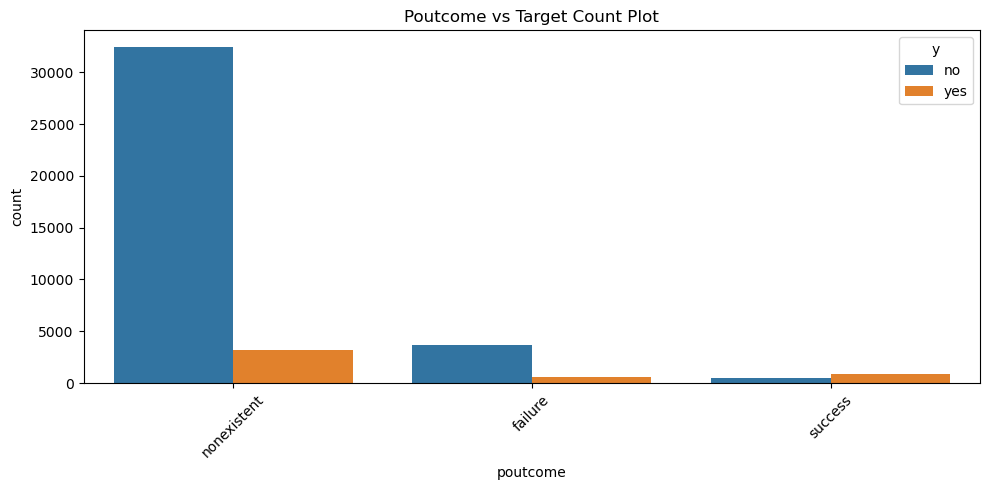

In [12]:
for col in cat_columns:
    if col != 'y':
        plt.figure(figsize=(10,5))
        sn.countplot(data = df, x = col, hue = 'y', order = df[col].value_counts().index)
        plt.xticks(rotation=45)
        plt.title(f'{col.title()} vs Target Count Plot')
        plt.tight_layout()
        plt.show()

### Correlation Heat Map

In [13]:
df.corr(numeric_only = True)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


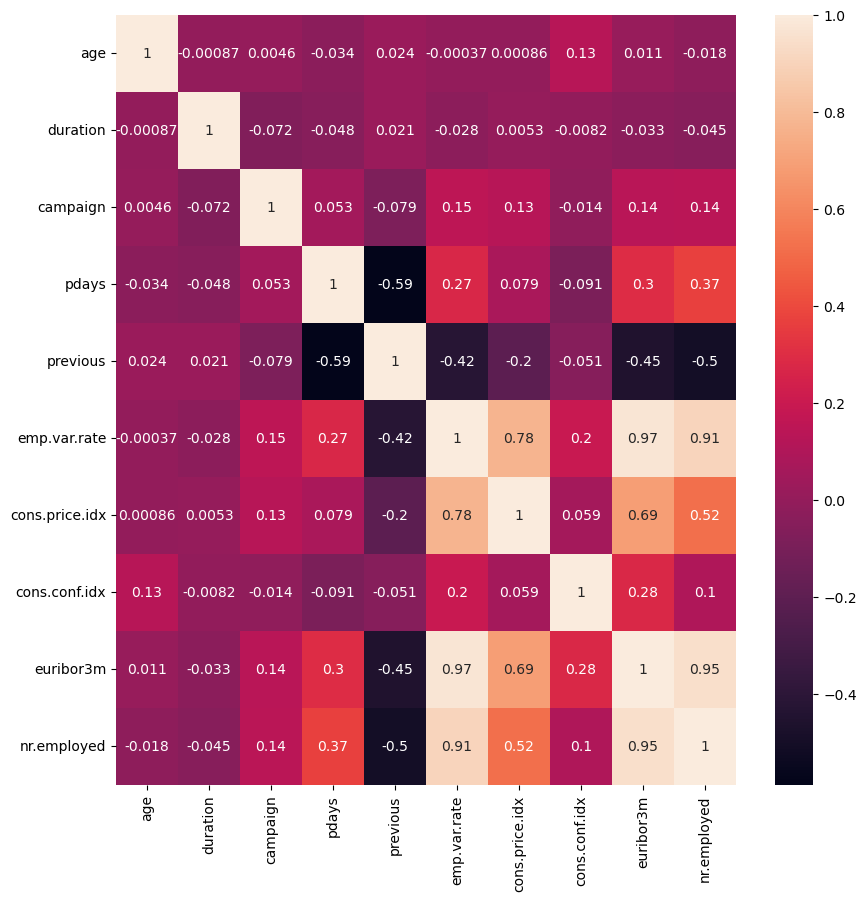

In [14]:
plt.figure(figsize=(10,10))
sn.heatmap(df.corr(numeric_only=True), annot = True)
plt.show()

#### Correlation with Target

In [15]:
df['y_binary'] = df['y'].map({'yes': 1, 'no': 0})
correlations = df.corr(numeric_only=True)['y_binary'].sort_values(ascending=False)
print(correlations)

y_binary          1.000000
duration          0.405274
previous          0.230181
cons.conf.idx     0.054878
age               0.030399
campaign         -0.066357
cons.price.idx   -0.136211
emp.var.rate     -0.298334
euribor3m        -0.307771
pdays            -0.324914
nr.employed      -0.354678
Name: y_binary, dtype: float64


## Preprocessing and Feature Engineering

#### Feature Engineering

In [16]:
# Target Variable

# y_binary already created

In [17]:
# To indicate whether the customer was previously contacted

df['was_prev_contacted'] = df['pdays'] != 999

In [18]:
df['was_prev_contacted'] = df['was_prev_contacted'].astype(int)

In [19]:
# If customer had positive response

df['had_success_before'] = df['poutcome'] == 'success'

In [20]:
df['had_success_before'] = df['had_success_before'].astype(int)

In [21]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_binary,was_prev_contacted,had_success_before
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1,0,0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0,0,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0,0,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1,0,0


#### Capping Skewed Features

In [22]:
# Skewness found in campaign and previous, capping the skewness

df['capped_campaign'] = df['campaign'].apply(lambda x:x if x <= 5 else 5)
df['capped_previous'] = df['previous'].apply(lambda x:x if x <= 3 else 3)

In [23]:
# from sklearn.impute import SimpleImputer , to handle skewed data

#### Grouping in Categories

In [24]:
# Based on Age
df['age_group'] = pd.cut(df['age'],bins=[0,30,45,60,100],labels=['Young','Adult','Senior','Elder'])

# Based on Job
rare_jobs = df['job'].value_counts()[df['job'].value_counts()<1000].index
df['job_group'] = df['job'].replace(rare_jobs,'other')

#### Encoding

In [25]:
df.select_dtypes(include = 'object').nunique().sort_values()

contact         2
y               2
default         3
housing         3
loan            3
poutcome        3
marital         4
day_of_week     5
education       8
month          10
job_group      11
job            12
dtype: int64

In [26]:
df = df.drop(['job','y','duration','poutcome'],axis=1)

# REASON TO DROP
# Job - We added Job Group in Feature Engineering, So we don't need Job column. Keeping it may cause Redundancy
# y - We created Target Variable from y as y_binary
# duration - The duration is only known after the call happens
  # But model is supposed to predict whether the customer will say yes before the call
  # So it may cause Data Leakage, so Dropping
# poutcome - Created had_success_before column in Feature Engineering so dropping poutcome

#### Binary Encoding - Mapping

In [27]:
df['default'] = df['default'].map({'yes':1,'no':0,'unknown':-1})
df['housing'] = df['housing'].map({'yes':1,'no':0,'unknown':-1})
df['loan'] = df['loan'].map({'yes':1,'no':0,'unknown':-1})

#### One Hot Encoding

In [28]:
df = pd.get_dummies(df,columns = ['marital','day_of_week','month','job_group','age_group','contact'],drop_first=True)

#### Ordinal Encoding

In [29]:
education_order = {
    'illiterate':0,
    'basic.4y':1,
    'basic.6y':2,
    'basic.9y':3,
    'high.school':4,
    'professional.course':5,
    'university.degree':6,
    'unknown':-1
}

df['education'] = df['education'].map(education_order)

In [30]:
print(df.shape)
print(df.dtypes)

(41188, 48)
age                          int64
education                    int64
default                      int64
housing                      int64
loan                         int64
campaign                     int64
pdays                        int64
previous                     int64
emp.var.rate               float64
cons.price.idx             float64
cons.conf.idx              float64
euribor3m                  float64
nr.employed                float64
y_binary                     int64
was_prev_contacted           int32
had_success_before           int32
capped_campaign              int64
capped_previous              int64
marital_married               bool
marital_single                bool
marital_unknown               bool
day_of_week_mon               bool
day_of_week_thu               bool
day_of_week_tue               bool
day_of_week_wed               bool
month_aug                     bool
month_dec                     bool
month_jul                     bool
month_ju

In [31]:
df

,age,education,default,housing,loan,campaign,pdays,previous,emp.var.rate,cons.price.idx,...,job_group_other,job_group_retired,job_group_self-employed,job_group_services,job_group_technician,job_group_unemployed,age_group_Adult,age_group_Senior,age_group_Elder,contact_telephone
0,56,1,0,0,0,1,999,0,1.1,93.994,...,False,False,False,False,False,False,False,True,False,True
1,57,4,-1,0,0,1,999,0,1.1,93.994,...,False,False,False,True,False,False,False,True,False,True
2,37,4,0,1,0,1,999,0,1.1,93.994,...,False,False,False,True,False,False,True,False,False,True
3,40,2,0,0,0,1,999,0,1.1,93.994,...,False,False,False,False,False,False,True,False,False,True
4,56,4,0,0,1,1,999,0,1.1,93.994,...,False,False,False,True,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,0,1,0,1,999,0,-1.1,94.767,...,False,True,False,False,False,False,False,False,True,False
41184,46,5,0,0,0,1,999,0,-1.1,94.767,...,False,False,False,False,False,False,False,True,False,False
41185,56,6,0,1,0,2,999,0,-1.1,94.767,...,False,True,False,False,False,False,False,True,False,False
41186,44,5,0,0,0,1,999,0,-1.1,94.767,...,False,False,False,False,True,False,True,False,False,False


In [32]:
# Converting bool to int

bool_columns = df.select_dtypes(include='bool').columns
df[bool_columns] = df[bool_columns].astype(int)

In [33]:
print(df.dtypes)

age                          int64
education                    int64
default                      int64
housing                      int64
loan                         int64
campaign                     int64
pdays                        int64
previous                     int64
emp.var.rate               float64
cons.price.idx             float64
cons.conf.idx              float64
euribor3m                  float64
nr.employed                float64
y_binary                     int64
was_prev_contacted           int32
had_success_before           int32
capped_campaign              int64
capped_previous              int64
marital_married              int32
marital_single               int32
marital_unknown              int32
day_of_week_mon              int32
day_of_week_thu              int32
day_of_week_tue              int32
day_of_week_wed              int32
month_aug                    int32
month_dec                    int32
month_jul                    int32
month_jun           

## Train Test Split

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [35]:
X = df.drop(['y_binary'],axis=1)
y = df['y_binary']

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)  # maintain proportion of yes/no

# When splitting data into training and testing sets, especially in classification problems with imbalanced classes (like yours: ~5000 yes vs ~35000 no),
# you want the class proportions to remain the same in both sets. If you don’t use stratify=y, the train/test split might randomly put too many "yes"
# values in one set and too few in another. That will make your model learn incorrectly due to class imbalance.

### Feature Scaling

In [37]:
scaler = StandardScaler()

X_trained_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Converting Scaled Arrays to DataFrame

In [38]:
X_trained_scaled = pd.DataFrame(X_trained_scaled,columns = X_train.columns,index = X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns,index = X_test.index)

# TASK 2 - Building Predictive Model

## Model Building - Binary Classification

#### Baseline Model - Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [40]:
log_model = LogisticRegression(max_iter = 1000, random_state = 42, class_weight = 'balanced')

In [41]:
log_model.fit(X_trained_scaled,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [42]:
y_pred_log = log_model.predict(X_test_scaled)

In [43]:
print(f'Confusion Matrix: {confusion_matrix(y_test,y_pred_log)}')
print(f'Classification Report: {classification_report(y_test,y_pred_log)}')
print(f'ROC AUC Score: {roc_auc_score(y_test,y_pred_log)}')

Confusion Matrix: [[6282 1028]
 [ 330  598]]
Classification Report:               precision    recall  f1-score   support

           0       0.95      0.86      0.90      7310
           1       0.37      0.64      0.47       928

    accuracy                           0.84      8238
   macro avg       0.66      0.75      0.69      8238
weighted avg       0.88      0.84      0.85      8238

ROC AUC Score: 0.7518836383791688


#### Tree Based Model - Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rfc_model = RandomForestClassifier(class_weight = 'balanced', random_state = 42, n_jobs = 1, n_estimators = 100)

In [46]:
rfc_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=1, random_state=42)

In [47]:
y_pred_rfc = rfc_model.predict(X_test)

In [48]:
print(f'Confusion Matrix: {confusion_matrix(y_test, y_pred_rfc)}')
print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred_rfc)}')
print(f'Classification Report: {classification_report(y_test, y_pred_rfc)}')

Confusion Matrix: [[7104  206]
 [ 654  274]]
ROC AUC Score: 0.6335390230671258
Classification Report:               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7310
           1       0.57      0.30      0.39       928

    accuracy                           0.90      8238
   macro avg       0.74      0.63      0.67      8238
weighted avg       0.88      0.90      0.88      8238



### SMOTE Over Sampling

In [50]:
from imblearn.over_sampling import SMOTE

In [51]:
smote = SMOTE(random_state = 42)

In [53]:
X_trained_resample, y_trained_resample = smote.fit_resample(X_trained_scaled, y_train)

In [58]:
rfc_smote = RandomForestClassifier(random_state = 42)

In [59]:
rfc_smote.fit(X_trained_resample, y_trained_resample)

RandomForestClassifier(random_state=42)

In [60]:
y_pred_smote = rfc_smote.predict(X_test_scaled)

In [61]:
print(f'Confusion Matrix: {confusion_matrix(y_test,y_pred_smote)}')
print(f'ROC AUC Score: {roc_auc_score(y_test,y_pred_smote)}')
print(f'Classification Report: {classification_report(y_test,y_pred_smote)}')

Confusion Matrix: [[7010  300]
 [ 572  356]]
ROC AUC Score: 0.671290508986273
Classification Report:               precision    recall  f1-score   support

           0       0.92      0.96      0.94      7310
           1       0.54      0.38      0.45       928

    accuracy                           0.89      8238
   macro avg       0.73      0.67      0.70      8238
weighted avg       0.88      0.89      0.89      8238



### XGBoost - Tree Based Model

In [62]:
from xgboost import XGBClassifier

In [65]:
df['y_binary'].value_counts()

y_binary
0    36548
1     4640
Name: count, dtype: int64

In [67]:
print(36548/4640)  # imbalance ration

7.876724137931035


In [69]:
xgb = XGBClassifier(random_state = 42, scale_pos_weight = 7.8)

In [70]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [71]:
y_pred_xgb = xgb.predict(X_test)

In [72]:
print(f'Confusion Matrix: {confusion_matrix(y_test,y_pred_xgb)}')
print(f'ROC AUC Score: {roc_auc_score(y_test,y_pred_xgb)}')
print(f'Classification Report: {classification_report(y_test,y_pred_xgb)}')

Confusion Matrix: [[6392  918]
 [ 365  563]]
ROC AUC Score: 0.7405498195669608
Classification Report:               precision    recall  f1-score   support

           0       0.95      0.87      0.91      7310
           1       0.38      0.61      0.47       928

    accuracy                           0.84      8238
   macro avg       0.66      0.74      0.69      8238
weighted avg       0.88      0.84      0.86      8238



### Hyperparameter Tuning

Randomized Search CV

In [74]:
from sklearn.model_selection import RandomizedSearchCV

In [75]:
xgb_rcv = XGBClassifier(random_state = 42, use_label_encode = False, eval_metric = 'logloss')

In [76]:
# Parameters

param = {
    'n_estimators':[100,200,300],
    'max_depth':[3,4,5,6,7],
    'learning_rate':[0.01,0.05,0.1,0.2],
    'subsample':[0.6,0.8,1.0],
    'colsample_bytree':[0.6,0.8,1.0],
    'gamma':[0,0.1,0.2,0.4],
    'min_child_weight':[1,3,5,7],
    'scale_pos_weight':[1,3,5,10]
    
}

In [78]:
rs = RandomizedSearchCV(xgb_rcv, param_distributions = param, n_iter = 5, scoring = 'roc_auc', n_jobs = -1, cv = 5, verbose = 2, random_state = 42)

In [80]:
rs.fit(X_trained_resample, y_trained_resample) # Train smote data and see score(scale_pos_weight) whether to use smote data or train data for modeling after tuning

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\User\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [21:43:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encode" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2, 0.4],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [100, 200, 300],
                                        'scale_pos_weight': [1, 3, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [82]:
print(rs.best_params_)
print(rs.best_score_)

{'subsample': 0.6, 'scale_pos_weight': 3, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.8}
0.9733505882962785


In [84]:
xgb_tuned = XGBClassifier(n_estimators=300,
    max_depth=7,
    min_child_weight=5,
    subsample=0.6,
    colsample_bytree=0.8,
    gamma=0.1,
    learning_rate=0.05,
    scale_pos_weight=3,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42)

In [94]:
xgb_tuned.fit(X_train,y_train)

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [21:53:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0.1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [95]:
y_pred_tune = xgb.predict(X_test)

In [96]:
print(f'Confusion Matrix: {confusion_matrix(y_test,y_pred_tune)}')
print(f'ROC AUC Score: {roc_auc_score(y_test,y_pred_tune)}')
print(f'Classification Report: {classification_report(y_test,y_pred_tune)}')

Confusion Matrix: [[6392  918]
 [ 365  563]]
ROC AUC Score: 0.7405498195669608
Classification Report:               precision    recall  f1-score   support

           0       0.95      0.87      0.91      7310
           1       0.38      0.61      0.47       928

    accuracy                           0.84      8238
   macro avg       0.66      0.74      0.69      8238
weighted avg       0.88      0.84      0.86      8238



 - High precision for Class 0 (non-buyers) and decent recall for Class 1 (buyers).

 - Recall for Class 1 is 61%, meaning you're correctly identifying more than half the actual buyers — a big win in marketing.

 - Solid ROC AUC (0.74) → It separates buyers from non-buyers better than random.

 - Better than baseline models or SMOTE-RFC.

Saving the model

In [97]:
import pickle

In [99]:
with open('xgb_tuned.pkl','wb') as f:
    pickle.dump(xgb_tuned,f)

# TASK 3

 - Previously Called customers with successful poutcome are more likely to subscribe
 - Seniors and Adults show different response patterns, Suggesting separate campaign based on age group
 - Negative Correlation with highly contacted customer i.e. more than 5 times
 - Certain Profession like Retired, Management shows more interest
 - March, May, October month good for campaign